In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import tensorflow as tf

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [4]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [5]:
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [6]:
np.unique(y, return_counts=True)

(array([0, 1], dtype=int64), array([7963, 2037], dtype=int64))

In [7]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [8]:
from sklearn.compose import ColumnTransformer
                                # tipo      #coluna    #preserva as outras colunas
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = ct.fit_transform(X) # Transformar em um matriz, a transformação vai primeira coluna

In [9]:
from imblearn.over_sampling import SMOTE
st = SMOTE(sampling_strategy='minority')
X, y = st.fit_resample(X, y)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [11]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.000000,1.000000,643.474690,0.442616,45.114768,6.213080,0.000000,1.557384,0.557384,0.000000,58906.283345
1,0.0,1.000000,0.000000,651.000000,1.000000,26.000000,5.000000,147037.320000,1.000000,0.000000,0.000000,141763.260000
2,0.0,1.000000,0.000000,598.129231,0.403692,45.073846,7.174154,135695.572949,2.788923,1.000000,1.000000,71549.151404
3,1.0,0.000000,0.000000,432.000000,1.000000,42.000000,9.000000,152603.450000,1.000000,1.000000,0.000000,110265.240000
4,0.0,0.101213,0.898787,543.501884,0.101213,50.708490,1.202426,140055.115302,2.797574,0.101213,0.101213,69828.459013


In [12]:
sc = StandardScaler()
X_train[:,[3, 5, 6, 7, 8, 11]] = sc.fit_transform(X_train[:,[3, 5, 6, 7, 8, 11]])
X_test[:,[3, 5, 6, 7, 8, 11]] = sc.transform(X_test[:,[3, 5, 6, 7, 8, 11]])

In [13]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.000000,1.000000,-0.055091,0.442616,0.403739,0.458197,-1.326788,0.079548,0.557384,0.000000,-0.717633
1,0.0,1.000000,0.000000,0.026446,1.000000,-1.510802,0.011793,1.073510,-0.838886,0.000000,0.000000,0.722052
2,0.0,1.000000,0.000000,-0.546412,0.403692,0.399640,0.811864,0.888362,2.108827,1.000000,1.000000,-0.497956
3,1.0,0.000000,0.000000,-2.346434,1.000000,0.091763,1.483760,1.164374,-0.838886,1.000000,0.000000,0.174757
4,0.0,0.101213,0.898787,-1.138303,0.101213,0.964008,-1.385682,0.959529,2.123082,0.101213,0.101213,-0.527854


In [14]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.244704,0.755296,0.000000,0.978381,0.755296,0.819516,0.485424,0.661660,-0.838886,0.755296,0.755296,1.341203
1,0.759542,0.000000,0.240458,-0.936014,0.240458,0.716809,1.129813,-1.326788,-0.838886,1.000000,0.000000,0.863531
2,0.000000,1.000000,0.000000,0.156467,1.000000,0.792885,0.747777,0.569303,2.456631,1.000000,1.000000,-0.275383
3,0.956922,0.000000,0.043078,-0.253367,1.000000,1.372273,-1.060477,-1.326788,-0.838886,0.956922,0.956922,0.104838
4,0.634010,0.365990,0.000000,-0.341104,0.365990,0.956548,0.406309,0.370732,-0.838886,1.000000,0.634010,1.153500


In [15]:
# Criando um modelo sequencial
ann = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=6, activation='relu'), # se x > 0 retorna x se não retorna 0
    tf.keras.layers.Dense(units=6, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid') # Faz cálculo tras valores entre 0 a 1 
])

In [16]:
#ann.add(tf.keras.layers.Dense(units=6, activation='relu'))   é possível add dps
#ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
#ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [17]:
# Compilando o modelo com o otimizador 'adam', função de perda 'binary_crossentropy' e a métrica de 'accuracy'
ann.compile(
    optimizer = 'adam',  # Responsável por orientar o aprendizado do modelo ao longo do tempo, permitindo que ele faça previsões mais precisas e minimize o erro
    loss = 'binary_crossentropy', # É a função que calcula o erro entre a previsão e o valor real, fornecendo um valor de perda. quanto maior o valor pior
    metrics = ['accuracy']  # 'accuracy' será monitorada durante o treinamento, calculando a proporção de previsões corretas. threshold x >= 0.5 padrão
)

In [18]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [19]:
# Treinando o modelo com os dados de treinamento (X_train e y_train) por 100 épocas e usando lotes de 32 amostras por vez
ann.fit(
    X_train, y_train,
    batch_size = 32,  # O modelo processará 312 amostras por vez, antes de atualizar os pesos.
    epochs = 70  # O modelo passará por todo o conjunto de treinamento 70 vezes durante o treinamento.
)

Epoch 1/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step - accuracy: 0.5475 - loss: 0.7230
Epoch 2/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.7124 - loss: 0.5814
Epoch 3/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 459us/step - accuracy: 0.7434 - loss: 0.5328
Epoch 4/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.7539 - loss: 0.5070
Epoch 5/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 453us/step - accuracy: 0.7675 - loss: 0.4915
Epoch 6/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 498us/step - accuracy: 0.7748 - loss: 0.4788
Epoch 7/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - accuracy: 0.7822 - loss: 0.4728
Epoch 8/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 494us/step - accuracy: 0.7763 - loss: 0.4766
Epoch 9/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 513us/step - accuracy: 0.7772 - loss: 0.4688
Epoch 10/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.7817 - loss: 0.4704
Epoch 11/70
399/399 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.7829 - loss: 0.4605
Epoch 12/70
399/399 ━━━━━━━━━━

In [20]:
bob = np.array([[600,'France', "Male", 40, 3, 60000, 2, 1, 1, 50000]])
bob[:, 2] = le.transform(bob[:, 2])
bob = ct.transform(bob)
bob[:, [0,3,4,5,6,9]] = sc.transform(bob[:, [0,3,4,5,6,9]])
bob = bob.astype(float)
print(ann.predict(bob)>0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
[[False]]


In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step


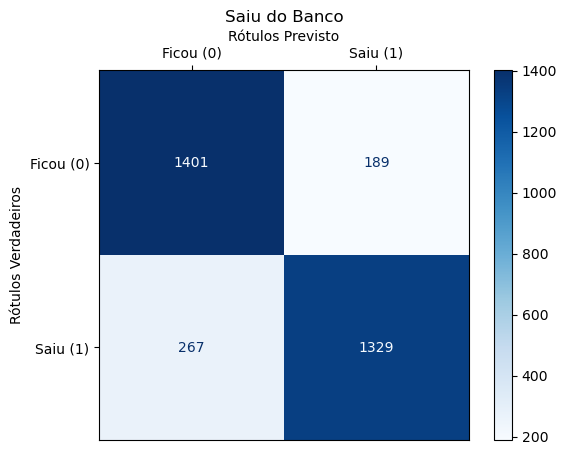

Acurácia: 85.69%


In [22]:
# Define os rótulos que serão exibidos na matriz de confusão
labels = ['Ficou (0)', 'Saiu (1)']

# Cria um objeto de exibição da matriz de confusão usando a matriz 'cm' e os rótulos especificados
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)  # Substitui 0 e 1 pelos rótulos definidos

# Cria uma nova figura e eixo para o gráfico da matriz de confusão
fig, ax = plt.subplots()

# Plota a matriz de confusão com a coloração azul
disp.plot(cmap=plt.cm.Blues, ax=ax)

# Move os rótulos do eixo x para a parte superior do gráfico
ax.xaxis.set_ticks_position('top')  # Coloca os rótulos do eixo x na parte superior
ax.xaxis.set_label_position('top')  # Coloca o rótulo do eixo x na parte superior

# Rotaciona os rótulos do eixo x, se necessário, para melhor legibilidade
plt.xticks(rotation=0)  # Rotaciona os rótulos se necessário

# Define o título e os rótulos dos eixos
plt.title("Saiu do Banco")  # Título do gráfico
plt.xlabel("Rótulos Previsto")  # Rótulo do eixo X em português
plt.ylabel("Rótulos Verdadeiros")  # Rótulo do eixo Y em português

# Exibe o gráfico da matriz de confusão
plt.show()

# Imprime a acurácia do modelo em formato percentual
print(f"Acurácia: {ac:.2%}")